# 109AL-F18 Analysis Notebook

### ***Authors***: Keith Mitchell/Chris Dao
#### Some helpful links are shown below regarding Jupyter Notebooks and what it is. Jupyter is a great platform for visualizing and actively working with data. We have put together a notebook that is meant to work based on your isolate spreadsheet being uploaded. 

Class outline:

* A quick installation check of [ipython](https://ipython.org/install.html) and [jupyter notebook](https://jupyter.readthedocs.io/en/latest/install.html)
* An overview of the IPython project from [the official website](http://ipython.org), and [jupyter](https://jupyter.org)
* Super basic intro to the notebook: typing code.
* [Notebook Basics](examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Customizing IPython - a condensed version](exercises/Customization/Condensed.ipynb)
* [Running a Secure Public Notebook Server](examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter/IPython works](examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

# Initial Setup
+ Install libraries still needed
    + OS: library for working with operating system where python is running
+ Import libraries
    + **Pandas**: library for working with dataframes (csv, tsv, excel, etc)
    + **Seaborn**: library for visualizing data (especially those in Pandas format)
    + **Scipy Stats**: library for statistical functions, here is a link to the functions 
        + https://docs.scipy.org/doc/scipy/reference/stats.html
+ Clean current excel imported csv, main thing here is we are collapsing the header rows to one columns
+ **IMPORTANT**: just check out what is printed before the next cell (see `print (new_header)`) this will be the data we are working with.
   

### First step paste the name of your file here in "" quotes. 

In [422]:
file_name = "109AL-F18_IsolateSpreadsheet_QS.csv"

In [423]:
# install libraries still needed.
import os
os.system('pip install seaborn')

%matplotlib inline


# import libraries of needed
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
data = pd.read_csv(file_name, encoding="latin1")

# clean the first few rows, and make a new header row
new_header = data.iloc[1] #grab the first row for the header
data = data[2:] #take the data less the header row
data.columns = new_header #set the header row as the df header

new_header = []
for row, header in zip(data.iloc[0], data.columns):
    if header and str(header) !='nan' and str(header) != 'NaN':
        recent_header=header
    if row and str(row) !='nan' and str(row) != 'NaN':
        new_header += [str(recent_header) + ' ' + str(row)]
    else:
        new_header += [header]  

data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header  
data = data.apply(pd.to_numeric, errors = "ignore") #convert numeric columns to float type


# and finally lets print the data we will be working with
print (new_header)    

['Isolate ID', 'Isolate Status', 'Field', 'Date of Last Streak', 'Isolate Purity', 'Number of Streaks Performed', 'Media Type', 'Colony Morphology', 'Colony Morphology 2nd streak', 'Cellular Morphology', 'Size (um)', 'Motility', 'Gram Stain', 'Submitted for Sequencing?', 'Cryogenic Information', 'Catalase  Trial 1', 'Catalase  Trial 2', 'Catalase  Trial 3', 'Catalase  Overall', 'Mannitol Fermentation Trial 1', 'Mannitol Fermentation Trial 2', 'Mannitol Fermentation Trial 3', 'Mannitol Fermentation Overall', 'Yellow Pigment Trial 1', 'Yellow Pigment Trial 2', 'Yellow Pigment Trial 3', 'Yellow Pigment Overall', 'Spore Forming Trial 1', 'Spore Forming Trial 2', 'Spore Forming Trial 3', 'Spore Forming Overall', 'Catalase Trial 1', 'Catalase Trial 2', 'Catalase Trial 3', 'Catalase Overall', 'Glucose Fermentation Trial 1', 'Glucose Fermentation Trial 2', 'Glucose Fermentation Trial 3', 'Glucose Fermentation Overall', 'Oxidase Test Trial 1', 'Oxidase Test Trial 2', 'Oxidase Test Trial 3', 'Ox

In [424]:
data.head()

,Isolate ID,Isolate Status,Field,Date of Last Streak,Isolate Purity,Number of Streaks Performed,Media Type,Colony Morphology,Colony Morphology 2nd streak,Cellular Morphology,...,SXT Trial 3,SXT Average,TE30 Trial 1,TE30 Trial 2,TE30 Trial 3,TE30 Average,Daptomycin Trial 1,Daptomycin Trial 2,Daptomycin Trial 3,Daptomycin Average
3,F18UCLA1091QS30I1,Active,23w1,11/1/2018,Not pure,5.0,ISP4,Orange-pink,"Form:circular, Elevation: umbonate; margin:curled",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F18UCLA1091QS30I2,Active,23w1,11/1/2018,Not pure,5.0,ISP4,Light orange-white,"Form: circular, Elevation: umbonate; margin: c...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F18UCLA1091QS30I3,Active,23w1,10/30/2018,Not pure,4.0,ISP4,"Lots of tiny colonies in quadrant 2, largest c...","Form: circular, Elevation: Crateriform; margin...",Bacillus Clustered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F18UCLA1091QS30I4,Active,23w1,11/1/2018,Pure,5.0,ISP4,"Lots of tiny colonies in quadrant 2, largest c...","Form: circular, Elevation: convex ; margin: en...",Bacillus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,F18UCLA1091QS30I5,Active,23w1,10/30/2018,Not pure,4.0,ISP4,"Lots of tiny colonies in quadrant 1, largest c...","Form: circular, Elevation: convex ; margin: en...",Bacillus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
# This code creates significance stars that we'll use later. For now, just run this cell.
def my_star(p_value):
    if p_value <= 0.001:
        return "***"
    elif p_value <= 0.01:
        return "**"
    elif p_value <= 0.05:
        return "*"
    else:
        return "None"
    
def plotStars(struct, values, p_value):
    x1, x2 = 0, 1   # columns (first column: 0, see plt.xticks())
    if my_star(p_value) is not "None":
        y, h, col = struct[values].max() + 1, .5, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, my_star(p_value), ha='center', va='bottom', color=col)
        plt.ylim(0,struct[values].max() + 4)
        
def testNan(x):
    return x != x

If you want to give 'nicknames' for any of the column names, edit the "alias_dict" line below. In the example, "Sample Site" will now also work as a name for "Field", "Phosphate Solubilization" will work for "Phosphate Solubilization (radius in mm) Overall", etc.

In [426]:
alias_dict = {'Field': 'Sample Site', 'Phosphate Solubilization (radius in mm) Overall': 'Phosphate Solubilization', 'Phosphate Solubilization (radius in mm) Trial Average': 'Isolate Phosphate Solubilization Index', 'Phosphate Solubilization (radius in mm) Control Average': 'Control Phosphate Solubilization Index'}

for k in alias_dict:
    data[alias_dict[k]] = data[k] 

# Counting isolates in categories
Fill out the first line of the following with the name of a category to summarize, then run the cell. It should be a categorical variable, and appear as one of the columns on the isolate spreadsheet.

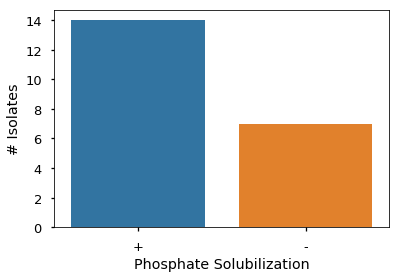

In [427]:
category = "Phosphate Solubilization"
category_summary = data.groupby([category]).size().reset_index(name='# Isolates')
category_summary.head()
sns.set_context('talk')
ax = sns.barplot(x=category, y="# Isolates", data=category_summary)

# Comparison of two categorical variables
Fill out the following cell with the column names of the two categorical variables you want to compare. "Independent category" will be plotted on the x axis, "Dependent category" will be shaded different colors. Then run the cells below.

In [428]:
independent_category = "Field"
dependent_category = "Phosphate Solubilization"

In [429]:
categorical_comparison = data.groupby([independent_category,dependent_category]).size().reset_index(name='# Isolates')
categorical_comparison.head()

,Field,Phosphate Solubilization,# Isolates
0,23w1,+,10
1,28d,+,4
2,28d,-,7


In [430]:
categorical_comparison_crosstab = pd.crosstab(data[independent_category], data[dependent_category])
categorical_comparison_p_value = stats.fisher_exact(categorical_comparison_crosstab)
print ({"Odds Ratio":categorical_comparison_p_value[0], "P-Value":categorical_comparison_p_value[1]})


{'Odds Ratio': inf, 'P-Value': 0.0038699690402476819}


In [431]:
title = "Phosphate Solubilization by Field"
y_axis_label = "# Isolates"
x_axis_label = "Field"

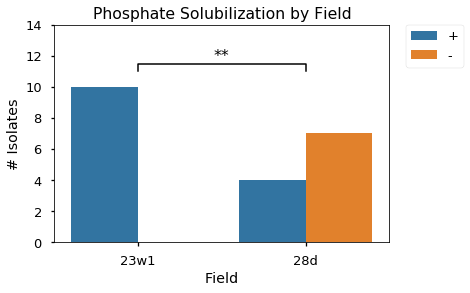

In [432]:
ax = sns.barplot(x=independent_category, y="# Isolates", hue=dependent_category, data=categorical_comparison)
ax.set(xlabel=x_axis_label, ylabel= y_axis_label, title=title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plotStars(categorical_comparison, "# Isolates", categorical_comparison_p_value[1])

In [433]:
#from statsmodels.graphics.mosaicplot import mosaic
#mosaic(categorical_comparison, [independent_category, dependent_category])

# Comparison of numeric data  

In [434]:
# if you want to remove  zeros (ie, negative trial results), set remove_zeroes to True, otherwise, set it to False

independent_category = "Field"
dependent_category = "Isolate Phosphate Solubilization Index"

remove_zeroes = True

In [435]:
list = data[independent_category].unique()

# remove NaNs from list by calling testNan() function
list = [i for i in list if not testNan(i)]

group1=data[(data[independent_category] == list[0])]
group2=data[(data[independent_category] == list[1])]

group1=group1[dependent_category].astype("float").values.tolist()
group2=group2[dependent_category].astype("float").values.tolist()
    

if remove_zeroes:
    group1 = [num for num in group1 if num != 0]
    group2 = [num for num in group2 if num != 0]

In [436]:
numeric_p_value = stats.ttest_ind(group1, group2, nan_policy="omit")

print({"T statistic": numeric_p_value.statistic, "P-Value": numeric_p_value.pvalue})


{'T statistic': 1.8401016929216605, 'P-Value': 0.084378862954716208}


In [437]:
title = "Phosphate Solubilization of Field 23 and 28"
x_axis_label = "Field"
y_axis_label = "Phosphate Solubilization Index"

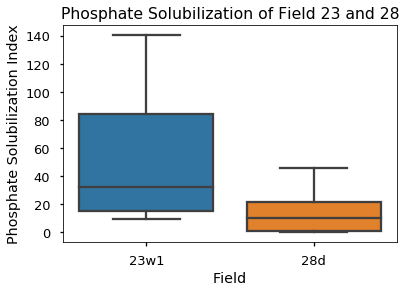

In [438]:
ax = sns.boxplot( x = data[independent_category], y = data[dependent_category])
ax.set(xlabel=x_axis_label, ylabel= y_axis_label, title=title)
plotStars(data, dependent_category, numeric_p_value.pvalue)

# Single Isolate Analysis

In [439]:
#### replace the code in here
num_trials = 3
isolate_name = "F18UCLA1091QS30I8"
first_category_name_trial1 = data.columns.get_loc("Phosphate Solubilization (radius in mm) Trial 1")
second_category_name_trial1 = data.columns.get_loc("Phosphate Solubilization (radius in mm) Control for Trial 1")
first_category_new_name = "Isolate"
second_category_new_name = "Control"
####

if not isolate_name in data["Isolate ID"].values: 
    print("Warning: isolate name not in data")


In [440]:
first_cat = data[data["Isolate ID"] == isolate_name].iloc[:,first_category_name_trial1:first_category_name_trial1+num_trials]
second_cat = data[data["Isolate ID"] == isolate_name].iloc[:,second_category_name_trial1:second_category_name_trial1+num_trials]
first_cat = first_cat.transpose().reset_index(drop=True)
first_cat.columns={"Values"}
first_cat['Category'] = first_category_new_name

second_cat = second_cat.transpose().reset_index(drop=True)
second_cat.columns={"Values"}
second_cat['Category'] = second_category_new_name

stru = first_cat.append(second_cat)
stru = stru.reset_index(drop=True)
stru = stru.astype(object)

p_value = stats.ttest_rel(stru[stru["Category"]=="Isolate"]["Values"].values.tolist(), stru[stru["Category"]=="Control"]["Values"].values.tolist())
print(p_value)



Ttest_relResult(statistic=-3.958633252188331, pvalue=0.058289435623937465)


In [441]:
x_axis_label = ""
y_axis_label = "Phosphate Solubilization Index"
title = "Phosphate Solubilization Efficiency of Isolate 4"


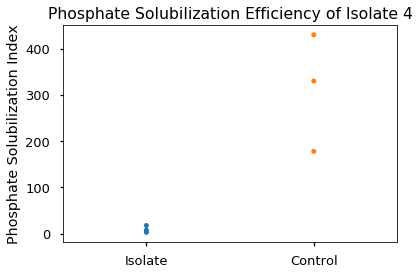

In [443]:
ax = sns.stripplot(x= stru["Category"], y=stru["Values"])
#stru.get("Category", "Category")
ax.set(xlabel=x_axis_label, ylabel=y_axis_label, title=title)
plotStars(stru, "Values", p_value.pvalue)

Testing stuff... ignore below

In [ ]:

#### replace the code in here
num_trials = 3
isolate_name = "F18UCLA1091AGA30M04"
first_category_name_trial1 = data.columns.get_loc("Cellulase Production (radius in mm) Trial 1")
second_category_name_trial1 = data.columns.get_loc("Control Production (radius in mm) Trial 1")
first_category_new_name = "Isolate"
second_category_new_name = "Control"
x_axis_label = ""
y_axis_label = "Clearing (mm)"
title = "Cellulase Efficency of Isolate 4"
####

first_cat = data[data["Isolate ID"] == isolate_name].iloc[:,first_category_name_trial1:first_category_name_trial1+num_trials]
second_cat = data[data["Isolate ID"] == isolate_name].iloc[:,second_category_name_trial1:second_category_name_trial1+num_trials]
first_cat = first_cat.transpose().reset_index(drop=True)
first_cat.columns={"Values"}
first_cat['Category'] = first_category_new_name

second_cat = second_cat.transpose().reset_index(drop=True)
second_cat.columns={"Values"}
second_cat['Category'] = second_category_new_name
stru = first_cat.append(second_cat)
stru = stru.reset_index(drop=True)
stru = stru.astype(object)
ax = sns.swarmplot(x= stru["Category"], y=stru["Values"])
#stru.get("Category", "Category")
ax.set(xlabel=x_axis_label, ylabel=y_axis_label, title=title)


p_value = stats.ttest_ind(stru[stru["Category"]=="Isolate"]["Values"].values.tolist(), stru[stru["Category"]=="Control"]["Values"].values.tolist())
print(p_value)

plotStars(stru, "Values", p_value)

In [ ]:
#### replace the code in here
num_trials = 3
isolate_names = ["F18UCLA1091AGA30M04", "F18UCLA1091AGA30M05"]
first_category_name_trial1 = data.columns.get_loc("Cellulase Production (radius in mm) Trial 1")
second_category_name_trial1 = data.columns.get_loc("Control Production (radius in mm) Trial 1")
first_category_new_name = "Isolate"
second_category_new_name = "Control"
x_axis_label = ""
y_axis_label = "Clearing (mm)"
title = "Cellulase Efficency"
####

first_cat = data[data["Isolate ID"].isin(isolate_names)].iloc[:,first_category_name_trial1:first_category_name_trial1+num_trials]
first_cat.index = data[data["Isolate ID"].isin(isolate_names)]["Isolate ID"]

first_cat = first_cat.transpose()
first_cat = first_cat.reset_index(drop=True)
first_cat = first_cat.stack().to_frame()
first_cat = first_cat.reset_index(level=1)
first_cat["Category"] = "Isolate"
first_cat.columns = ["Isolate ID", "Values", "Category"]


second_cat = data[data["Isolate ID"].isin(isolate_names)].iloc[:,second_category_name_trial1:second_category_name_trial1+num_trials]
second_cat.index = data[data["Isolate ID"].isin(isolate_names)]["Isolate ID"]

second_cat = second_cat.transpose()
second_cat = second_cat.reset_index(drop=True)
second_cat = second_cat.stack().to_frame()
second_cat = second_cat.reset_index(level=1)
second_cat["Category"] = "Control"
second_cat.columns = ["Isolate ID", "Values", "Category"]

cats = first_cat.append(second_cat)
cats
ax = sns.stripplot(x = "Isolate ID", y = "Values", hue = "Category", data = cats, dodge=True)
ax.set(xlabel=x_axis_label, ylabel=y_axis_label, title=title)
